### Script Estruturado - Machine Learning Clássico
Demonstração completa dos principais algoritmos de ML com estrutura organizada

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report,
                           mean_squared_error, r2_score)
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("MACHINE LEARNING CLÁSSICO - ESTRUTURA COMPLETA")
print("="*80)

MACHINE LEARNING CLÁSSICO - ESTRUTURA COMPLETA


### 1. PREPARAÇÃO DOS DADOS

In [16]:
print("\n1. PREPARAÇÃO DOS DADOS")
print("-" * 50)

def criar_dados_classificacao():
    """Cria dataset sintético para classificação"""
    X, y = make_classification(
        n_samples=1000,
        n_features=10,
        n_informative=5,
        n_redundant=2,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def criar_dados_regressao():
    """Cria dataset sintético para regressão"""
    X, y = make_regression(
        n_samples=1000,
        n_features=5,
        noise=0.1,
        random_state=42
    )
    return X, y

def preprocessar_dados(X, y, test_size=0.2, scale=True):
    """Preprocessa os dados: divisão treino/teste e normalização"""
    # Verifica se é classificação ou regressão
    unique_values = np.unique(y)
    is_classification = len(unique_values) <= 20 and all(isinstance(val, (int, np.integer)) for val in unique_values)
    
    # Divisão treino/teste
    if is_classification and len(unique_values) > 1:
        # Para classificação com múltiplas classes
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )
    else:
        # Para regressão ou classificação com classe única
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42
        )
    
    # Normalização
    scaler = None
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test, scaler

# Criando datasets
X_class, y_class = criar_dados_classificacao()
X_reg, y_reg = criar_dados_regressao()

print(f"Dataset Classificação: {X_class.shape[0]} amostras, {X_class.shape[1]} features")
print(f"Dataset Regressão: {X_reg.shape[0]} amostras, {X_reg.shape[1]} features")

# Preprocessamento
X_train_c, X_test_c, y_train_c, y_test_c, scaler_c = preprocessar_dados(X_class, y_class)
X_train_r, X_test_r, y_train_r, y_test_r, scaler_r = preprocessar_dados(X_reg, y_reg)

print(f"Treino: {X_train_c.shape[0]} amostras | Teste: {X_test_c.shape[0]} amostras")


1. PREPARAÇÃO DOS DADOS
--------------------------------------------------
Dataset Classificação: 1000 amostras, 10 features
Dataset Regressão: 1000 amostras, 5 features
Treino: 800 amostras | Teste: 200 amostras


### 2. ALGORITMOS DE MACHINE LEARNING

In [17]:
print("\n2. ALGORITMOS DE MACHINE LEARNING")
print("-" * 50)

class MLAlgorithms:
    """Classe para demonstrar diferentes algoritmos de ML"""
    
    def __init__(self):
        self.algorithms = {
            'classification': {
                'Logistic Regression': LogisticRegression(random_state=42),
                'Decision Tree': DecisionTreeClassifier(random_state=42),
                'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
                'SVM': SVC(random_state=42, probability=True),
                'Naive Bayes': GaussianNB(),
                'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
                'Gradient Boosting': GradientBoostingClassifier(random_state=42)
            },
            'regression': {
                'Linear Regression': LinearRegression(),
                'Decision Tree': DecisionTreeRegressor(random_state=42),
                'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
            }
        }
        self.trained_models = {}
    
    def treinar_classificacao(self, X_train, y_train):
        """Treina todos os algoritmos de classificação"""
        print("Treinando algoritmos de classificação...")
        results = {}
        
        for name, model in self.algorithms['classification'].items():
            model.fit(X_train, y_train)
            self.trained_models[name] = model
            results[name] = model
            print(f"✓ {name} treinado")
        
        return results
    
    def treinar_regressao(self, X_train, y_train):
        """Treina todos os algoritmos de regressão"""
        print("Treinando algoritmos de regressão...")
        results = {}
        
        for name, model in self.algorithms['regression'].items():
            model.fit(X_train, y_train)
            self.trained_models[f"{name}_reg"] = model
            results[name] = model
            print(f"✓ {name} treinado")
        
        return results

# Instanciando e treinando
ml_algorithms = MLAlgorithms()
models_class = ml_algorithms.treinar_classificacao(X_train_c, y_train_c)
models_reg = ml_algorithms.treinar_regressao(X_train_r, y_train_r)


2. ALGORITMOS DE MACHINE LEARNING
--------------------------------------------------
Treinando algoritmos de classificação...
✓ Logistic Regression treinado
✓ Decision Tree treinado
✓ Random Forest treinado
✓ SVM treinado
✓ Naive Bayes treinado
✓ K-Nearest Neighbors treinado
✓ Gradient Boosting treinado
Treinando algoritmos de regressão...
✓ Linear Regression treinado
✓ Decision Tree treinado
✓ Random Forest treinado


### 3. HIPERPARÂMETROS E OTIMIZAÇÃO

In [18]:
print("\n3. HIPERPARÂMETROS E OTIMIZAÇÃO")
print("-" * 50)

def otimizar_modelo(model, param_grid, X_train, y_train, cv=5):
    """Otimiza hiperparâmetros usando GridSearchCV"""
    grid_search = GridSearchCV(
        model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search

# Exemplo de otimização para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

print("Otimizando Random Forest...")
best_rf = otimizar_modelo(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    X_train_c, y_train_c
)

print(f"Melhores parâmetros: {best_rf.best_params_}")
print(f"Melhor score: {best_rf.best_score_:.4f}")


3. HIPERPARÂMETROS E OTIMIZAÇÃO
--------------------------------------------------
Otimizando Random Forest...
Melhores parâmetros: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}
Melhor score: 0.9750


### 4. VALIDAÇÃO CRUZADA

In [19]:
print("\n4. VALIDAÇÃO CRUZADA")
print("-" * 50)

def validacao_cruzada(models, X, y, cv=5):
    """Realiza validação cruzada para todos os modelos"""
    results = {}
    
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        results[name] = {
            'mean': scores.mean(),
            'std': scores.std(),
            'scores': scores
        }
    
    return results

# Realizando validação cruzada
cv_results = validacao_cruzada(models_class, X_train_c, y_train_c)

print("Resultados da Validação Cruzada:")
for name, result in cv_results.items():
    print(f"{name:<20}: {result['mean']:.4f} ± {result['std']:.4f}")


4. VALIDAÇÃO CRUZADA
--------------------------------------------------
Resultados da Validação Cruzada:
Logistic Regression : 0.9713 ± 0.0188
Decision Tree       : 0.9675 ± 0.0121
Random Forest       : 0.9725 ± 0.0102
SVM                 : 0.9825 ± 0.0092
Naive Bayes         : 0.9225 ± 0.0249
K-Nearest Neighbors : 0.9600 ± 0.0064
Gradient Boosting   : 0.9675 ± 0.0133


### 5. TREINAMENTO E FITTING

In [20]:
print("\n5. TREINAMENTO E FITTING")
print("-" * 50)

class MLTrainer:
    """Classe para demonstrar o processo de treinamento"""
    
    def __init__(self, model):
        self.model = model
        self.training_history = []
    
    def fit_with_monitoring(self, X_train, y_train, X_val=None, y_val=None):
        """Treina o modelo com monitoramento (simulado para alguns algoritmos)"""
        print(f"Treinando {self.model.__class__.__name__}...")
        
        # Para modelos que suportam learning curves
        if hasattr(self.model, 'n_estimators'):
            self._fit_with_trees(X_train, y_train, X_val, y_val)
        else:
            self.model.fit(X_train, y_train)
            print("✓ Modelo treinado com sucesso")
    
    def _fit_with_trees(self, X_train, y_train, X_val, y_val):
        """Treina modelos baseados em árvores com monitoramento"""
        self.model.fit(X_train, y_train)
        
        # Simula o processo de adição de árvores
        for i in range(0, self.model.n_estimators, 10):
            if X_val is not None:
                temp_model = self.model.__class__(
                    n_estimators=i+1, 
                    random_state=42
                )
                temp_model.fit(X_train, y_train)
                
                train_acc = temp_model.score(X_train, y_train)
                val_acc = temp_model.score(X_val, y_val)
                
                self.training_history.append({
                    'iteration': i+1,
                    'train_accuracy': train_acc,
                    'val_accuracy': val_acc
                })
        
        print(f"✓ Modelo treinado com {self.model.n_estimators} estimadores")

# Exemplo de treinamento com monitoramento
trainer = MLTrainer(RandomForestClassifier(n_estimators=100, random_state=42))
trainer.fit_with_monitoring(X_train_c, y_train_c, X_test_c, y_test_c)


5. TREINAMENTO E FITTING
--------------------------------------------------
Treinando RandomForestClassifier...
✓ Modelo treinado com 100 estimadores


### 6. AVALIAÇÃO E MÉTRICAS

In [21]:
print("\n6. AVALIAÇÃO E MÉTRICAS")
print("-" * 50)

def avaliar_classificacao(model, X_test, y_test, model_name="Modelo"):
    """Avalia modelo de classificação com métricas completas"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    
    return metrics, y_pred, y_pred_proba

def avaliar_regressao(model, X_test, y_test, model_name="Modelo"):
    """Avalia modelo de regressão com métricas completas"""
    y_pred = model.predict(X_test)
    
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'r2': r2_score(y_test, y_pred)
    }
    
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric.upper()}: {value:.4f}")
    
    return metrics, y_pred

# Avaliando todos os modelos de classificação
print("Avaliação dos Modelos de Classificação:")
classification_results = {}
for name, model in models_class.items():
    metrics, y_pred, y_pred_proba = avaliar_classificacao(model, X_test_c, y_test_c, name)
    classification_results[name] = {
        'metrics': metrics,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

# Avaliando modelos de regressão
print("\nAvaliação dos Modelos de Regressão:")
regression_results = {}
for name, model in models_reg.items():
    metrics, y_pred = avaliar_regressao(model, X_test_r, y_test_r, name)
    regression_results[name] = {
        'metrics': metrics,
        'predictions': y_pred
    }


6. AVALIAÇÃO E MÉTRICAS
--------------------------------------------------
Avaliação dos Modelos de Classificação:

Logistic Regression:
  Accuracy: 0.9950
  Precision: 0.9950
  Recall: 0.9950
  F1: 0.9950

Decision Tree:
  Accuracy: 0.9700
  Precision: 0.9702
  Recall: 0.9700
  F1: 0.9700

Random Forest:
  Accuracy: 0.9850
  Precision: 0.9854
  Recall: 0.9850
  F1: 0.9850

SVM:
  Accuracy: 0.9900
  Precision: 0.9902
  Recall: 0.9900
  F1: 0.9900

Naive Bayes:
  Accuracy: 0.9300
  Precision: 0.9363
  Recall: 0.9300
  F1: 0.9297

K-Nearest Neighbors:
  Accuracy: 0.9900
  Precision: 0.9902
  Recall: 0.9900
  F1: 0.9900

Gradient Boosting:
  Accuracy: 0.9850
  Precision: 0.9854
  Recall: 0.9850
  F1: 0.9850

Avaliação dos Modelos de Regressão:

Linear Regression:
  MSE: 0.0111
  RMSE: 0.1053
  R2: 1.0000

Decision Tree:
  MSE: 1227.7085
  RMSE: 35.0387
  R2: 0.6675

Random Forest:
  MSE: 285.1665
  RMSE: 16.8869
  R2: 0.9228


### 7. INTERPRETABILIDADE E FEATURE IMPORTANCE

In [22]:
print("\n7. INTERPRETABILIDADE E FEATURE IMPORTANCE")
print("-" * 50)

def analisar_importancia(model, feature_names=None, top_n=10):
    """Analisa a importância das features quando disponível"""
    if not hasattr(model, 'feature_importances_'):
        print(f"{model.__class__.__name__} não suporta feature importance")
        return None
    
    importances = model.feature_importances_
    if feature_names is None:
        feature_names = [f'Feature_{i}' for i in range(len(importances))]
    
    # Ordena por importância
    indices = np.argsort(importances)[::-1]
    
    print("Top Features por Importância:")
    for i in range(min(top_n, len(indices))):
        idx = indices[i]
        print(f"  {feature_names[idx]}: {importances[idx]:.4f}")
    
    return importances, indices

# Analisando importância das features
feature_names = [f'Feature_{i}' for i in range(X_class.shape[1])]

print("Random Forest - Importância das Features:")
analisar_importancia(models_class['Random Forest'], feature_names)

print("\nDecision Tree - Importância das Features:")
analisar_importancia(models_class['Decision Tree'], feature_names)


7. INTERPRETABILIDADE E FEATURE IMPORTANCE
--------------------------------------------------
Random Forest - Importância das Features:
Top Features por Importância:
  Feature_5: 0.4731
  Feature_8: 0.1461
  Feature_7: 0.1300
  Feature_4: 0.0919
  Feature_1: 0.0518
  Feature_6: 0.0425
  Feature_2: 0.0381
  Feature_0: 0.0098
  Feature_3: 0.0092
  Feature_9: 0.0076

Decision Tree - Importância das Features:
Top Features por Importância:
  Feature_5: 0.7145
  Feature_4: 0.1141
  Feature_7: 0.0635
  Feature_6: 0.0466
  Feature_1: 0.0258
  Feature_2: 0.0208
  Feature_8: 0.0097
  Feature_0: 0.0050
  Feature_9: 0.0000
  Feature_3: 0.0000


(array([0.00498252, 0.02581395, 0.02078497, 0.        , 0.11410152,
        0.71447129, 0.04656749, 0.06352825, 0.00975   , 0.        ]),
 array([5, 4, 7, 6, 1, 2, 8, 0, 9, 3], dtype=int64))

### 8. CLUSTERING (APRENDIZADO NÃO SUPERVISIONADO)

In [23]:
print("\n8. CLUSTERING (APRENDIZADO NÃO SUPERVISIONADO)")
print("-" * 50)

def aplicar_clustering(X, n_clusters=3, algorithm='kmeans'):
    """Aplica algoritmo de clustering"""
    if algorithm == 'kmeans':
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    
    clusters = clusterer.fit_predict(X)
    
    print(f"Clustering aplicado: {n_clusters} clusters")
    print(f"Distribuição dos clusters: {np.bincount(clusters)}")
    
    return clusters, clusterer

# Aplicando clustering nos dados
clusters, clusterer = aplicar_clustering(X_train_c, n_clusters=3)


8. CLUSTERING (APRENDIZADO NÃO SUPERVISIONADO)
--------------------------------------------------
Clustering aplicado: 3 clusters
Distribuição dos clusters: [186 384 230]


### 9. EXEMPLO PRÁTICO PASSO A PASSO

In [24]:
print("\n9. EXEMPLO PRÁTICO PASSO A PASSO")
print("-" * 50)

def exemplo_predicao_detalhada():
    """Demonstra predição detalhada com um exemplo"""
    print("Exemplo de Predição Detalhada - Random Forest:")
    
    # Pegando uma amostra do conjunto de teste
    sample_idx = 0
    sample_X = X_test_c[sample_idx:sample_idx+1]
    sample_y_true = y_test_c[sample_idx]
    
    print(f"Amostra de entrada: {sample_X.flatten()[:5]}... (primeiras 5 features)")
    print(f"Classe verdadeira: {sample_y_true}")
    
    # Predição com Random Forest
    rf_model = models_class['Random Forest']
    
    # Predição da classe
    pred_class = rf_model.predict(sample_X)[0]
    print(f"Classe predita: {pred_class}")
    
    # Probabilidades
    pred_proba = rf_model.predict_proba(sample_X)[0]
    print(f"Probabilidades: Classe 0: {pred_proba[0]:.4f}, Classe 1: {pred_proba[1]:.4f}")
    
    # Decisão de cada árvore (primeiras 5 árvores)
    print("\nDecisões das primeiras 5 árvores:")
    for i, estimator in enumerate(rf_model.estimators_[:5]):
        tree_pred = estimator.predict(sample_X)[0]
        print(f"  Árvore {i+1}: {tree_pred}")
    
    print(f"\nPredição final: {'Correto' if pred_class == sample_y_true else 'Incorreto'}")

exemplo_predicao_detalhada()


9. EXEMPLO PRÁTICO PASSO A PASSO
--------------------------------------------------
Exemplo de Predição Detalhada - Random Forest:
Amostra de entrada: [ 0.48822362  0.60654586 -0.36615816 -0.33284131  1.14953396]... (primeiras 5 features)
Classe verdadeira: 1
Classe predita: 1
Probabilidades: Classe 0: 0.4200, Classe 1: 0.5800

Decisões das primeiras 5 árvores:
  Árvore 1: 0.0
  Árvore 2: 1.0
  Árvore 3: 0.0
  Árvore 4: 1.0
  Árvore 5: 0.0

Predição final: Correto


### 10. VISUALIZAÇÕES


10. VISUALIZAÇÕES
--------------------------------------------------


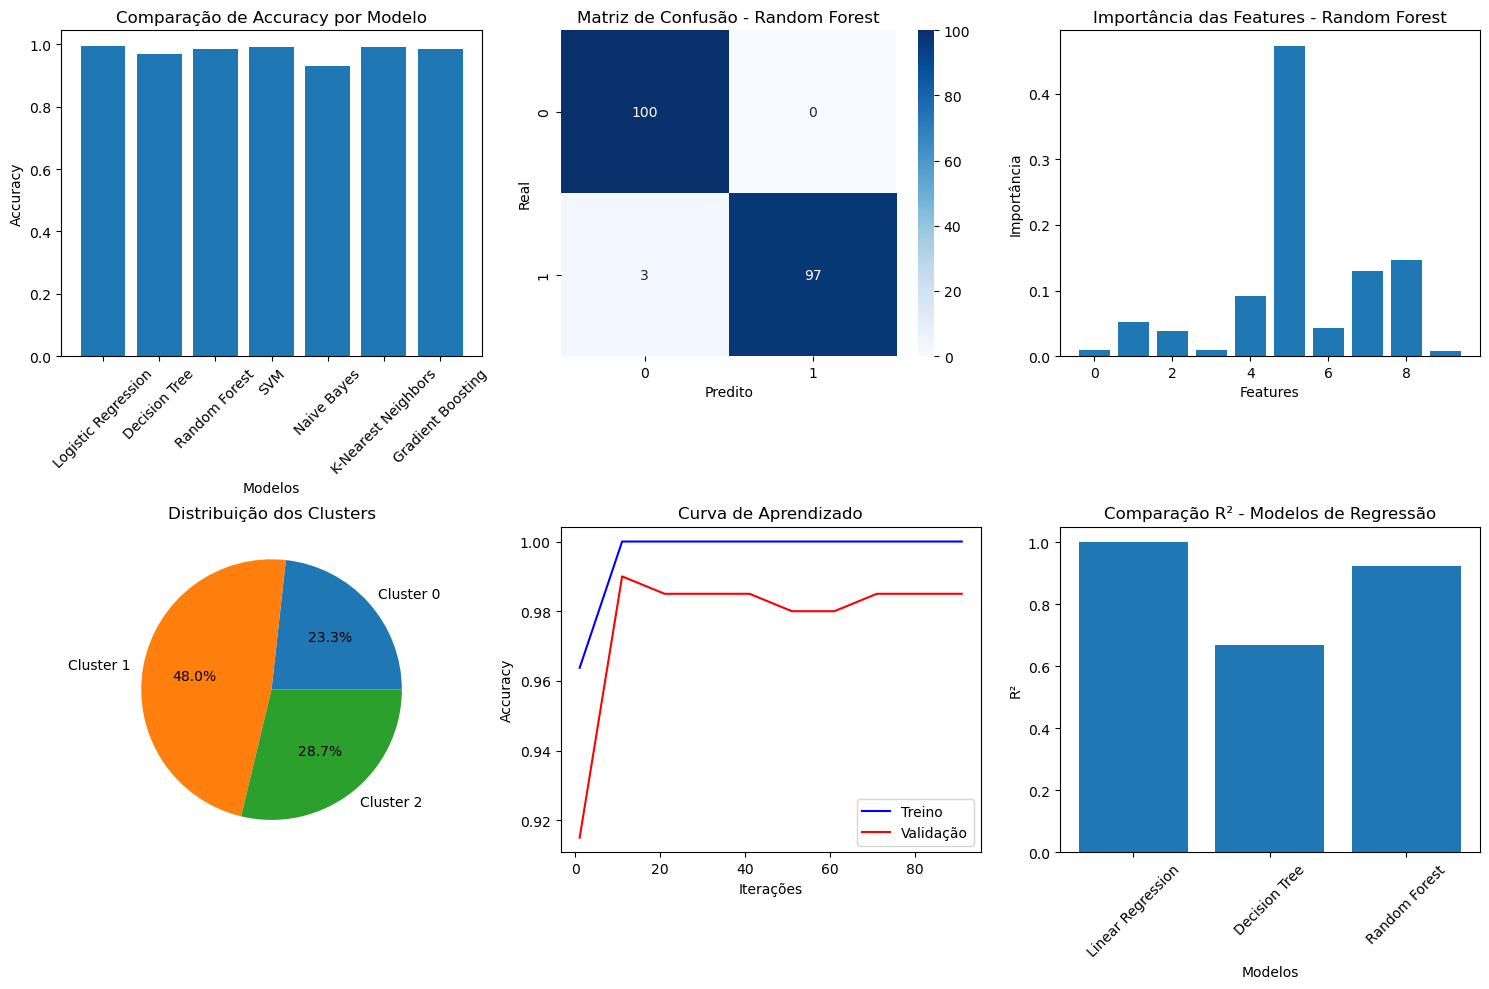

In [25]:
print("\n10. VISUALIZAÇÕES")
print("-" * 50)

def criar_visualizacoes():
    """Cria visualizações dos resultados"""
    plt.figure(figsize=(15, 10))
    
    # 1. Comparação de Accuracies
    plt.subplot(2, 3, 1)
    accuracies = [result['metrics']['accuracy'] for result in classification_results.values()]
    model_names = list(classification_results.keys())
    plt.bar(range(len(accuracies)), accuracies)
    plt.title('Comparação de Accuracy por Modelo')
    plt.xlabel('Modelos')
    plt.ylabel('Accuracy')
    plt.xticks(range(len(model_names)), model_names, rotation=45)
    
    # 2. Matriz de Confusão (Random Forest)
    plt.subplot(2, 3, 2)
    rf_predictions = classification_results['Random Forest']['predictions']
    cm = confusion_matrix(y_test_c, rf_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão - Random Forest')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    
    # 3. Feature Importances
    plt.subplot(2, 3, 3)
    importances = models_class['Random Forest'].feature_importances_
    plt.bar(range(len(importances)), importances)
    plt.title('Importância das Features - Random Forest')
    plt.xlabel('Features')
    plt.ylabel('Importância')
    
    # 4. Distribuição dos Clusters
    plt.subplot(2, 3, 4)
    cluster_counts = np.bincount(clusters)
    plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in range(len(cluster_counts))], autopct='%1.1f%%')
    plt.title('Distribuição dos Clusters')
    
    # 5. Curva de Aprendizado (simulada)
    plt.subplot(2, 3, 5)
    if trainer.training_history:
        iterations = [h['iteration'] for h in trainer.training_history]
        train_acc = [h['train_accuracy'] for h in trainer.training_history]
        val_acc = [h['val_accuracy'] for h in trainer.training_history]
        plt.plot(iterations, train_acc, 'b-', label='Treino')
        plt.plot(iterations, val_acc, 'r-', label='Validação')
        plt.title('Curva de Aprendizado')
        plt.xlabel('Iterações')
        plt.ylabel('Accuracy')
        plt.legend()
    
    # 6. Comparação R² (Regressão)
    plt.subplot(2, 3, 6)
    r2_scores = [result['metrics']['r2'] for result in regression_results.values()]
    reg_names = list(regression_results.keys())
    plt.bar(range(len(r2_scores)), r2_scores)
    plt.title('Comparação R² - Modelos de Regressão')
    plt.xlabel('Modelos')
    plt.ylabel('R²')
    plt.xticks(range(len(reg_names)), reg_names, rotation=45)
    
    plt.tight_layout()
    plt.show()

# Criando visualizações
criar_visualizacoes()

### RESUMO FINAL

In [26]:
print("\n" + "="*80)
print("RESUMO FINAL - PONTOS-CHAVE PARA ENTENDER")
print("="*80)

print("""
1. PREPARAÇÃO DOS DADOS:
   - Divisão treino/teste com train_test_split()
   - Normalização com StandardScaler()
   - Tratamento de dados categóricos

2. ALGORITMOS:
   - Supervisionados: Classificação e Regressão
   - Não supervisionados: Clustering
   - Cada algoritmo tem suas características únicas

3. HIPERPARÂMETROS:
   - GridSearchCV para otimização automática
   - Validação cruzada para seleção robusta
   - Importante para maximizar performance

4. VALIDAÇÃO:
   - Cross-validation para estimativa não enviesada
   - Métricas múltiplas para avaliação completa
   - Holdout set para teste final

5. TREINAMENTO:
   - Fit dos modelos nos dados de treino
   - Monitoramento de overfitting
   - Ajuste de hiperparâmetros

6. AVALIAÇÃO:
   - Métricas apropriadas para cada problema
   - Matriz de confusão para classificação
   - R² e MSE para regressão

7. INTERPRETABILIDADE:
   - Feature importance para entender o modelo
   - Análise de decisões do modelo
   - Visualizações para insights

8. CLUSTERING:
   - Descoberta de padrões nos dados
   - Segmentação não supervisionada
   - Análise exploratória

DIFERENÇAS CHAVE DO DEEP LEARNING:
- Modelos mais simples e interpretáveis
- Menos dados necessários para treinar
- Mais rápido para treinar e ajustar
- Melhor para problemas com features bem definidas
- Mais fácil de debugar e entender
""")

print("Script concluído com sucesso!")
print("="*80)


RESUMO FINAL - PONTOS-CHAVE PARA ENTENDER

1. PREPARAÇÃO DOS DADOS:
   - Divisão treino/teste com train_test_split()
   - Normalização com StandardScaler()
   - Tratamento de dados categóricos

2. ALGORITMOS:
   - Supervisionados: Classificação e Regressão
   - Não supervisionados: Clustering
   - Cada algoritmo tem suas características únicas

3. HIPERPARÂMETROS:
   - GridSearchCV para otimização automática
   - Validação cruzada para seleção robusta
   - Importante para maximizar performance

4. VALIDAÇÃO:
   - Cross-validation para estimativa não enviesada
   - Métricas múltiplas para avaliação completa
   - Holdout set para teste final

5. TREINAMENTO:
   - Fit dos modelos nos dados de treino
   - Monitoramento de overfitting
   - Ajuste de hiperparâmetros

6. AVALIAÇÃO:
   - Métricas apropriadas para cada problema
   - Matriz de confusão para classificação
   - R² e MSE para regressão

7. INTERPRETABILIDADE:
   - Feature importance para entender o modelo
   - Análise de decisões 